# Baseball Statistics using K-Means Clustering
## Suhho Lee

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

## 1. Data Preprocessing

In [2]:
# Load data
df = pd.read_csv('baseball_hitting.csv')
df.head()

,Player name,position,Games,At-bat,Runs,Hits,Double (2B),third baseman,home run,run batted in,a walk,Strikeouts,stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
0,B Bonds,LF,2986.0,9847.0,2227.0,2935.0,601.0,77.0,762.0,1996.0,2558.0,1539,514.0,141,0.298,0.444,0.607,1.051
1,H Aaron,RF,3298.0,12364.0,2174.0,3771.0,624.0,98.0,755.0,2297.0,1402.0,1383,240.0,73,0.305,0.374,0.555,0.929
2,B Ruth,RF,2504.0,8399.0,2174.0,2873.0,506.0,136.0,714.0,2213.0,2062.0,1330,123.0,117,0.342,0.474,0.690,1.164
3,A Pujols,1B,3080.0,11421.0,1914.0,3384.0,686.0,16.0,703.0,2218.0,1373.0,1404,117.0,43,0.296,0.374,0.544,0.918
4,A Rodriguez,SS,2784.0,10566.0,2021.0,3115.0,548.0,31.0,696.0,2086.0,1338.0,2287,329.0,76,0.295,0.380,0.550,0.930


In [3]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            2500 non-null   object 
 1   position               2500 non-null   object 
 2   Games                  2500 non-null   float64
 3   At-bat                 2500 non-null   float64
 4   Runs                   2500 non-null   float64
 5   Hits                   2500 non-null   float64
 6   Double (2B)            2500 non-null   float64
 7   third baseman          2500 non-null   float64
 8   home run               2500 non-null   float64
 9   run batted in          2500 non-null   float64
 10  a walk                 2500 non-null   float64
 11  Strikeouts             2500 non-null   object 
 12  stolen base            2500 non-null   float64
 13  Caught stealing        2500 non-null   object 
 14  AVG                    2500 non-null   float64
 15  On-b

In [4]:
# Check for data shape
df.shape

(2508, 18)

In [5]:
# Check column names
df.columns

Index(['Player name', 'position', 'Games', 'At-bat', 'Runs', 'Hits',
       'Double (2B)', 'third baseman', 'home run', 'run batted in', 'a walk',
       'Strikeouts', 'stolen base ', 'Caught stealing', 'AVG',
       'On-base Percentage', 'Slugging Percentage', 'On-base Plus Slugging'],
      dtype='object')

In [6]:
df = df.rename(
    columns={
        'stolen base ': 'Stolen base',
        'Double (2B)': 'Double',
        'third baseman': 'Triple',
        'home run': 'HR',
        'run batted in': 'RBI',
        'a walk': 'Walk'
    }
)

### 1-1. Handling missing data

In [7]:
# Check NaN values for each column.
df.isna().sum()

Player name               8
position                  8
Games                     8
At-bat                    8
Runs                      8
Hits                      8
Double                    8
Triple                    8
HR                        8
RBI                       8
Walk                      8
Strikeouts                8
Stolen base               8
Caught stealing           8
AVG                       8
On-base Percentage        8
Slugging Percentage       8
On-base Plus Slugging    20
dtype: int64

In [8]:
# Check the rows with NaN as values
df[df.isna().any(axis=1)]

,Player name,position,Games,At-bat,Runs,Hits,Double,Triple,HR,RBI,Walk,Strikeouts,Stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,C Hickman,1B,921.0,3982.0,478.0,1176.0,217.0,91.0,59.0,614.0,153.0,--,72.0,0.771,0.295,0.331,0.440,NaN
1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,E Flick,RF,1085.0,5597.0,950.0,1752.0,268.0,164.0,48.0,756.0,597.0,--,330.0,0.834,0.313,0.389,0.445,NaN
1719,H Ferris,2B,1279.0,4800.0,473.0,1146.0,192.0,89.0,40.0,550.0,161.0,--,89.0,0.606,0.239,0.265,0.341,NaN
1741,H Ferris,2B,1279.0,4800.0,473.0,1146.0,192.0,89.0,40.0,550.0,161.0,--,89.0,0.606,0.239,0.265,0.341,NaN
1821,C Stahl,CF,782.0,5069.0,858.0,1546.0,219.0,118.0,36.0,622.0,470.0,--,189.0,0.785,0.305,0.369,0.416,NaN


In [9]:
# Drop rows with all values as NaN
df = df.dropna(how='all')
df[df.isna().any(axis=1)]

,Player name,position,Games,At-bat,Runs,Hits,Double,Triple,HR,RBI,Walk,Strikeouts,Stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
1399,C Hickman,1B,921.0,3982.0,478.0,1176.0,217.0,91.0,59.0,614.0,153.0,--,72.0,0.771,0.295,0.331,0.440,NaN
1520,E Flick,RF,1085.0,5597.0,950.0,1752.0,268.0,164.0,48.0,756.0,597.0,--,330.0,0.834,0.313,0.389,0.445,NaN
1719,H Ferris,2B,1279.0,4800.0,473.0,1146.0,192.0,89.0,40.0,550.0,161.0,--,89.0,0.606,0.239,0.265,0.341,NaN
1741,H Ferris,2B,1279.0,4800.0,473.0,1146.0,192.0,89.0,40.0,550.0,161.0,--,89.0,0.606,0.239,0.265,0.341,NaN
1821,C Stahl,CF,782.0,5069.0,858.0,1546.0,219.0,118.0,36.0,622.0,470.0,--,189.0,0.785,0.305,0.369,0.416,NaN
1948,T Hartsel,LF,1287.0,4848.0,826.0,1336.0,182.0,92.0,31.0,341.0,837.0,--,247.0,0.754,0.276,0.384,0.370,NaN
2062,D Green,RF,657.0,3484.0,552.0,1021.0,124.0,65.0,29.0,423.0,315.0,--,192.0,0.75,0.293,0.359,0.391,NaN
2148,D Brain,3B,676.0,2543.0,254.0,641.0,97.0,52.0,27.0,303.0,134.0,--,73.0,0.655,0.252,0.292,0.363,NaN
2303,C Hemphill,CF,1179.0,4541.0,580.0,1230.0,117.0,68.0,22.0,421.0,435.0,--,207.0,0.678,0.271,0.337,0.341,NaN
2328,W Conroy,3B,1379.0,5061.0,605.0,1257.0,176.0,82.0,22.0,452.0,345.0,--,262.0,0.63,0.248,0.301,0.329,NaN


In [10]:
# As the definition of OPS is calculated as OBP + SLG, 
# add the two values if OPS is NaN
df.loc[
    df['On-base Plus Slugging'].isna(), 
    'On-base Plus Slugging'
] = (
    df['On-base Percentage'] + df['Slugging Percentage']
)
df.isna().sum()

Player name              0
position                 0
Games                    0
At-bat                   0
Runs                     0
Hits                     0
Double                   0
Triple                   0
HR                       0
RBI                      0
Walk                     0
Strikeouts               0
Stolen base              0
Caught stealing          0
AVG                      0
On-base Percentage       0
Slugging Percentage      0
On-base Plus Slugging    0
dtype: int64

In [11]:
# Handle empty strikeout data by multiplying the entire 
# dataset's strikeout ratio onto At-bat value
df['Strikeouts'] = df['Strikeouts'].replace('--', np.nan)
df['Strikeouts'] = pd.to_numeric(df['Strikeouts'], errors='coerce')

df_ratio_calc = df[df["Strikeouts"] != np.nan]

strikeout_ratio = (
    df_ratio_calc['Strikeouts'].sum() / 
    df_ratio_calc['At-bat'].sum()
)

df.loc[
    df['Strikeouts'].isna(), 'Strikeouts'
] = (
    df.loc[df['Strikeouts'].isna(), 'At-bat'] * strikeout_ratio
)
df['Strikeouts'].isna().sum()

0

In [12]:
# Handle empty caught stealing data by replacing it with the mean

df['Caught stealing'] = df['Caught stealing'].replace('--', np.nan)
df['Caught stealing'] = pd.to_numeric(
    df['Caught stealing'], errors='coerce'
)

caught_stealing_mean = df["Caught stealing"].mean()
df["Caught stealing"].fillna(
    caught_stealing_mean, inplace = True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 2507
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player name            2500 non-null   object 
 1   position               2500 non-null   object 
 2   Games                  2500 non-null   float64
 3   At-bat                 2500 non-null   float64
 4   Runs                   2500 non-null   float64
 5   Hits                   2500 non-null   float64
 6   Double                 2500 non-null   float64
 7   Triple                 2500 non-null   float64
 8   HR                     2500 non-null   float64
 9   RBI                    2500 non-null   float64
 10  Walk                   2500 non-null   float64
 11  Strikeouts             2500 non-null   float64
 12  Stolen base            2500 non-null   float64
 13  Caught stealing        2500 non-null   float64
 14  AVG                    2500 non-null   float64
 15  On-base P

/var/folders/lv/vvf7kstx7655561b3lbhydv40000gn/T/ipykernel_27902/282004329.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Caught stealing"].fillna(


In [13]:
df.describe()

,Games,At-bat,Runs,Hits,Double,Triple,HR,RBI,Walk,Strikeouts,Stolen base,Caught stealing,AVG,On-base Percentage,Slugging Percentage,On-base Plus Slugging
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1084.558000,3714.962000,521.644800,1010.86560,181.858000,32.3308,100.611600,494.206400,373.038000,545.900407,76.09520,29.111971,0.263320,0.331582,0.409925,0.741507
std,595.403651,2290.458916,380.061349,681.62211,124.474271,35.6680,99.984933,362.625548,297.480896,375.126260,113.94476,31.096039,0.024778,0.030770,0.050081,0.072012
min,2.000000,262.000000,32.000000,57.00000,7.000000,0.0000,17.000000,37.000000,19.000000,1.000000,0.00000,0.000000,0.123000,0.157000,0.197000,0.354000
25%,616.750000,1874.500000,231.750000,471.25000,86.000000,9.0000,33.000000,222.000000,162.000000,268.750000,11.00000,8.000000,0.247000,0.311000,0.375000,0.693000
50%,998.000000,3266.500000,423.500000,853.50000,154.000000,20.0000,69.000000,404.000000,292.500000,449.000000,32.00000,20.000000,0.262000,0.330000,0.407000,0.737500
75%,1438.250000,5105.750000,719.250000,1399.25000,249.000000,42.2500,125.500000,656.250000,486.250000,714.000000,89.00000,37.000000,0.278000,0.351000,0.441000,0.784000
max,3562.000000,14053.000000,2295.000000,4256.00000,792.000000,309.0000,762.000000,2297.000000,2558.000000,2597.000000,1406.00000,335.000000,0.367000,0.482000,0.690000,1.164000


In [14]:
# Filter dataset with players who played at least 
# 5 full seasons and 2500 at bats
df = df[(df['Games'] >= 162 * 5) & (df['At-bat'] >= 2500)]
df.shape

(1504, 18)

### 1-2. Feature Selection and Scaling

In [15]:
batting_features = [
    'Runs', 'Hits', 'Double', 'Triple', 
    'HR', 'RBI', 'Walk', 'Strikeouts', 'Stolen base', 
    'Caught stealing', 'AVG', 'On-base Percentage', 
    'Slugging Percentage', 'On-base Plus Slugging'
]

In [16]:
X = df[batting_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Dimensionality Reduction

### 2-1. PCA Analysis

We decided to use PCA rather than t-SNE because PCA interprets global relationships between features, which is crucial for understanding how different baseball statistics relate. However, t-SNE focuses more on local structure and stochastic nature would make the analysis less reliable for this use case. In addition, PCA scales well to large datasets, making it more suitable as our baseball dataset gets larger over time.

In [17]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [18]:
# Get individual and cumulative explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [19]:
cumulative_variance

array([0.54022674, 0.71811663, 0.83724533, 0.89116801, 0.93009502,
       0.95935777, 0.97316109, 0.98580274, 0.99240861, 0.9956373 ,
       0.99746001, 0.99885269, 1.        , 1.        ])

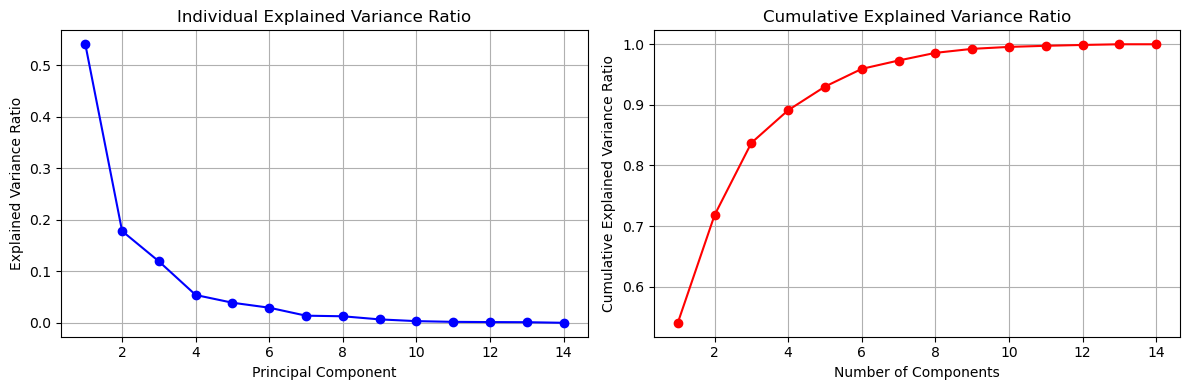

In [20]:
# Plot explained variance ratio
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(explained_variance) + 1),
    explained_variance, 'bo-'
)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.title('Individual Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance, 'ro-'
)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()

### Manual PCA

We decided to write our own PCA function and compare it with the scikit-learn's PCA.

In [21]:
randomarray = np.array([1, 2, 3])
randomarray[np.array([2, 0, 1])]

array([3, 1, 2])

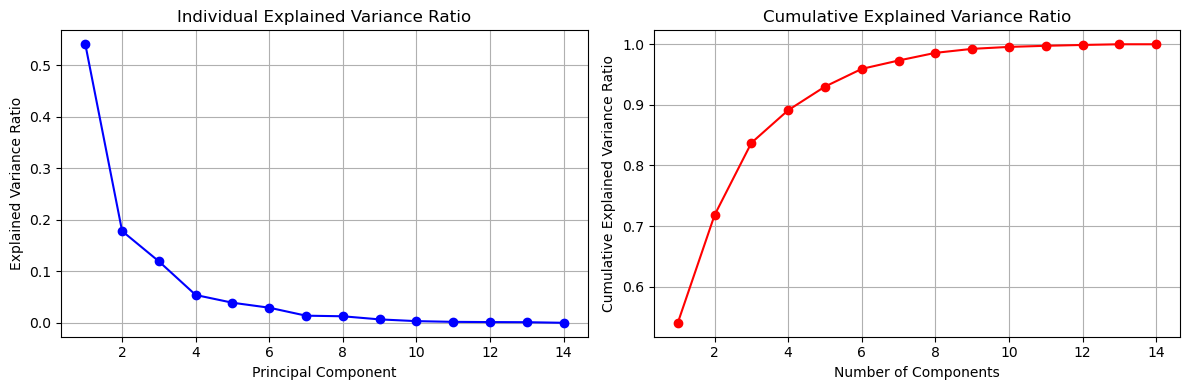

In [22]:
# Could erase manual
def manual_pca(X, n_components=None):
    """
    Manual implementation of PCA
    
    Parameters:
    - X: normalized data matrix of shape (n_samples, n_features)
    - n_components: number of components to keep
    
    Returns:
    - X_transformed: transformed data
    - explained_variance_ratio: ratio of variance explained 
      by each component
    - components: principal components
    """
    # Calculate covariance matrix
    cov_matrix = np.cov(X.T)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Calculate explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    
    # If n_components is not specified, keep all components
    if n_components is None:
        n_components = X.shape[1]
    
    # Select top n_components eigenvectors
    selected_components = eigenvectors[:, :n_components]
    
    # Transform the data
    X_transformed = np.dot(X, selected_components)
    
    return X_transformed, explained_variance_ratio, selected_components

# Apply manual PCA
X_pca, explained_variance_ratio, components = manual_pca(X_scaled)

# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance Ratio')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2-2. Selecting Number of Components

In [23]:
# Check first number of components when variance 
# is greater than equal to 0.8
n_components = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print('Selected components: ', n_components)

Selected components:  3


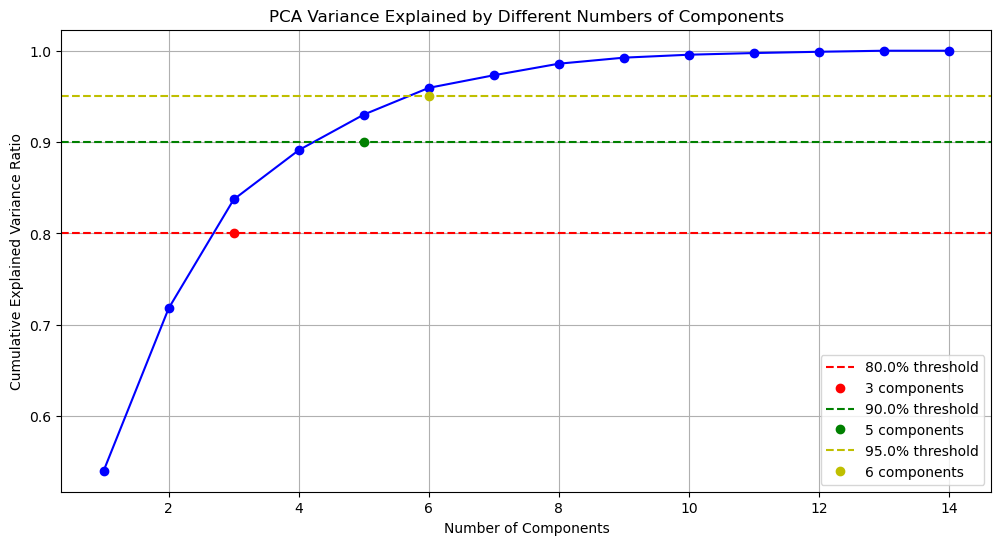

In [24]:
# Plot a graph of each component where the variance 
# is in each threshold

# Get thresholds
thresholds = [0.8, 0.9, 0.95]

# Plot cumulative variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), 
        cumulative_variance, 'bo-')
    
# Add horizontal lines for thresholds
colors = ['r', 'g', 'y', 'm']
for threshold, color in zip(thresholds, colors):
    plt.axhline(y=threshold, color=color, linestyle='--', 
                label=f'{threshold*100}% threshold')
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    plt.plot(n_components, threshold, 'o', color=color,
            label=f'{n_components} components')
    
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Variance Explained by Different Numbers of Components')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
# Get number of components and its top features when variance threshold is 0.8
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Threshold 80%: {n_components} components")

# Show feature importance for 3 components
print(f"Top features for {n_components} components:")
component_df = pd.DataFrame(
    components.T[:n_components], columns=batting_features
).T
for i in range(n_components):
    loadings = abs(component_df[i])
    top_features = loadings.sort_values(ascending=False)[:3]
    print(f"\nPC{i+1} top features:")
    for feat, val in top_features.items():
        print(f"{feat}: {abs(val):.3f}")
print("-" * 50)

Threshold 80%: 3 components
Top features for 3 components:

PC1 top features:
Runs: 0.343
RBI: 0.336
Double: 0.327

PC2 top features:
Stolen base: 0.464
Triple: 0.417
Caught stealing: 0.365

PC3 top features:
Strikeouts: 0.498
AVG: 0.475
On-base Percentage: 0.389
--------------------------------------------------


In [26]:
# Get number of components and its top features when variance threshold is 0.9
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Threshold 90%: {n_components} components")

# Show feature importance for 5 components
print(f"Top features for {n_components} components:")
component_df = pd.DataFrame(
    components.T[:n_components], columns=batting_features
).T
for i in range(n_components):
    loadings = abs(component_df[i])
    top_features = loadings.sort_values(ascending=False)[:3]
    print(f"\nPC{i+1} top features:")
    for feat, val in top_features.items():
        print(f"{feat}: {abs(val):.3f}")
print("-" * 50)

Threshold 90%: 5 components
Top features for 5 components:

PC1 top features:
Runs: 0.343
RBI: 0.336
Double: 0.327

PC2 top features:
Stolen base: 0.464
Triple: 0.417
Caught stealing: 0.365

PC3 top features:
Strikeouts: 0.498
AVG: 0.475
On-base Percentage: 0.389

PC4 top features:
Caught stealing: 0.506
On-base Percentage: 0.364
Stolen base: 0.333

PC5 top features:
Walk: 0.653
On-base Percentage: 0.451
Slugging Percentage: 0.407
--------------------------------------------------


In [27]:
# Get number of components and its top features when variance threshold is 0.95
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Threshold 95%: {n_components} components")

# Show feature importance for 6 components
print(f"Top features for {n_components} components:")
component_df = pd.DataFrame(
    components.T[:n_components], columns=batting_features
).T
for i in range(n_components):
    loadings = abs(component_df[i])
    top_features = loadings.sort_values(ascending=False)[:3]
    print(f"\nPC{i+1} top features:")
    for feat, val in top_features.items():
        print(f"{feat}: {abs(val):.3f}")
print("-" * 50)

Threshold 95%: 6 components
Top features for 6 components:

PC1 top features:
Runs: 0.343
RBI: 0.336
Double: 0.327

PC2 top features:
Stolen base: 0.464
Triple: 0.417
Caught stealing: 0.365

PC3 top features:
Strikeouts: 0.498
AVG: 0.475
On-base Percentage: 0.389

PC4 top features:
Caught stealing: 0.506
On-base Percentage: 0.364
Stolen base: 0.333

PC5 top features:
Walk: 0.653
On-base Percentage: 0.451
Slugging Percentage: 0.407

PC6 top features:
Triple: 0.565
AVG: 0.425
Stolen base: 0.362
--------------------------------------------------


We decided to use 3 components because there's a sharp increase in explained variance up to 3 components, explaining more than 80% of the variance. Also, contextually, most baseball hitting data are somewhat correlated which makes it hard to explain each component when extra components are added. Therefore, 3 components seem optimal to efficiently choose principal components while maintaining most patterns and reduce noise.

- PC1: Offensive production (Runs, RBI, Doubles)
- PC2: Player speed and power (Stolen Base, Triple, Caught stealing)
- PC3: Offensive discipline and contact ability (Strikeouts, AVG, On-base Percentage)

### 2-3. Perform Final PCA and Visualize

In [28]:
# Perform final PCA with n_components = 3
pca = PCA(n_components=3)
X_pca_reduced = pca.fit_transform(X_scaled)

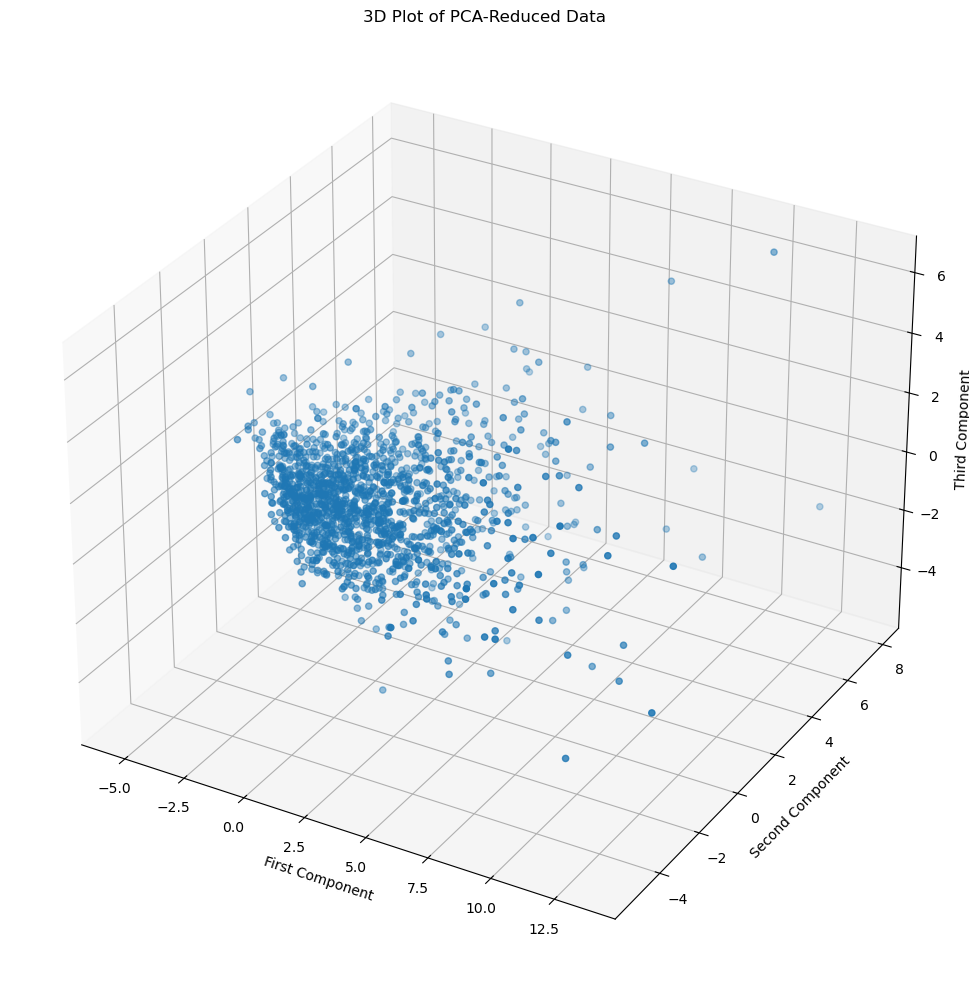

In [29]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_reduced[:, 0], 
    X_pca_reduced[:, 1], 
    X_pca_reduced[:, 2]
)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
plt.title('3D Plot of PCA-Reduced Data')
plt.tight_layout()
plt.show()

## 3. K-Means Clustering Implementation

### 3-1. K-Means Function

In [30]:
def kmeans_plus_plus(data, k):
    """
    K-Means++ Initialization for faster convergence
    """
    m = data.shape[0]
    centroids = []
    
    # Randomly select the first centroid
    centroids.append(data[np.random.choice(m)])
    
    for _ in range(1, k):
        # Compute the distance from each point to the nearest centroid
        distances = np.min(
            [
                np.linalg.norm(data - centroid, axis=1) ** 2 
                for centroid in centroids
            ],
            axis=0
        )
        
        # Compute probabilities proportional to the distances
        probabilities = distances / distances.sum()
        
        # Select the next centroid based on the probabilities
        # Points that are further away are more likely to be selected
        next_centroid_index = np.random.choice(m, p=probabilities)
        centroids.append(data[next_centroid_index])
    
    return np.array(centroids)


def k_means(data, k, max_iterations=100, print_complexity=False):
    """
    K-Means Clustering Algorithm
    """
    m, n = data.shape
    centroids = kmeans_plus_plus(data, k)

    for iteration in range(max_iterations):
        # Assign points to nearest centroid
        distances = np.linalg.norm(
            data[:, np.newaxis, :] - centroids, axis=2
        )
        assignments = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array(
            [data[assignments == j].mean(axis=0) for j in range(k)]
        )
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
            
        centroids = new_centroids

    if print_complexity:
        complexity = m * k * (iteration + 1) * n
        print(f"Time Complexity Analysis:")
        print(f"Number of Points (m): {m}")
        print(f"Number of Clusters (K): {k}")
        print(f"Number of Iterations (I): {iteration + 1}")
        print(f"Number of Attributes (n): {n}")

    return centroids, [np.where(assignments == j)[0] for j in range(k)]

### 3-2. Get Optimal Clusters

We used the elbow method and silhouette scores first to check the optimal number of clusters.

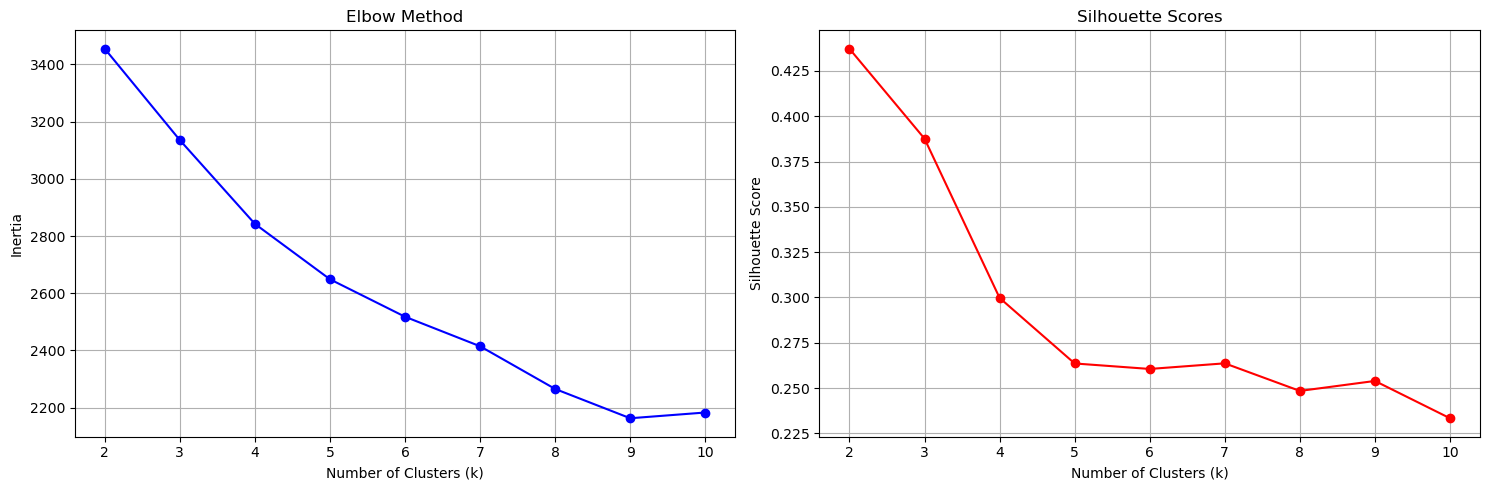

In [31]:
# Analyze optimal clusters
inertias = []
silhouette_scores = []
    
# Calculate scores for different k values
K = range(2, 11)
    
for k in K:
    # Run k-means
    centroids, clusters = k_means(X_pca_reduced, k)
        
    # Calculate inertia
    distances = np.linalg.norm(
        X_pca_reduced[:, np.newaxis, :] - centroids, axis=2
    )
    assignments = np.argmin(distances, axis=1)
    inertia = np.sum(np.min(distances, axis=1))
    inertias.append(inertia)
        
    # Calculate silhouette score
    if k > 1: 
        silhouette_avg = silhouette_score(
            X_pca_reduced, assignments
        )
        silhouette_scores.append(silhouette_avg)
    
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
# Elbow Method
ax1.plot(K, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)
    
# Silhouette Scores
ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores')
ax2.grid(True)
    
plt.tight_layout()

We could not see a distinct elbow after multiple tests, but the silhouette score has a drop at k=2 to k=3 and k=3 to k=4, so it was hard to distinguish the optimal number of clusters. Therefore, we looked into each of the clusters into more detail.

In [32]:
# Function to analyze clusters
def analyze_clusters(X_pca_reduced, df, k):
    # Perform k-means
    centroids, clusters = k_means(X_pca_reduced, k)
    
    # Create cluster assignments
    cluster_assignments = np.zeros(len(X_pca_reduced))
    for i, cluster in enumerate(clusters):
        cluster_assignments[cluster] = i
    
    # Add cluster assignments to DataFrame
    df_with_clusters = df.copy()
    df_with_clusters[f'Cluster_{k}'] = cluster_assignments
    
    # Calculate cluster statistics
    cluster_stats = df_with_clusters.groupby(
        f'Cluster_{k}'
    )[batting_features].mean()
    
    # Calculate cluster sizes
    cluster_sizes = df_with_clusters[f'Cluster_{k}'].value_counts()
    
    return cluster_stats, cluster_sizes, clusters

K=3 Cluster Sizes:
Cluster_3
0.0    816
1.0    501
2.0    187
Name: count, dtype: int64

K=3 Cluster Statistics:
                  Runs         Hits      Double     Triple          HR  \
Cluster_3                                                                
0.0         482.329657   993.245098  176.797794  28.482843   91.037990   
1.0         869.658683  1661.023952  294.381238  64.421158  130.115768   
2.0        1321.197861  2362.459893  443.727273  62.294118  358.021390   

                   RBI         Walk   Strikeouts  Stolen base  \
Cluster_3                                                       
0.0         462.285539   339.020833   590.153227    61.645833   
1.0         767.572854   597.512974   678.409060   157.810379   
2.0        1361.385027  1031.203209  1290.272727   158.342246   

           Caught stealing       AVG  On-base Percentage  Slugging Percentage  \
Cluster_3                                                                       
0.0              28.388778  

Text(0.5, 0.92, 'K=3 Clusters')

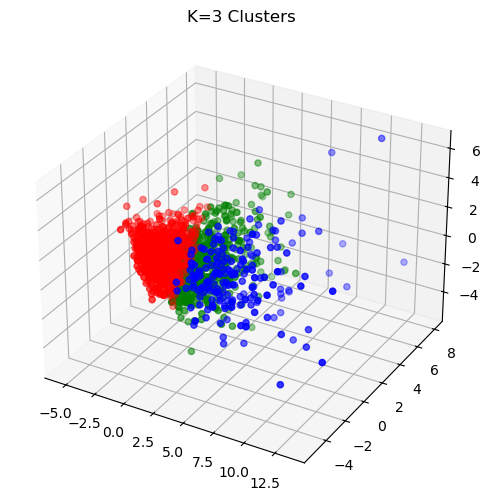

In [33]:
# Get statistics for k=3
stats_k3, sizes_k3, clusters3 = analyze_clusters(X_pca_reduced, df, 3)

print("K=3 Cluster Sizes:")
print(sizes_k3)
print("\nK=3 Cluster Statistics:")
print(stats_k3)

# K=3 plot
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')
colors3 = ['r', 'g', 'b']
for i, cluster in enumerate(clusters3):
    ax1.scatter(X_pca_reduced[cluster, 0], 
                X_pca_reduced[cluster, 1], 
                X_pca_reduced[cluster, 2], 
                c=colors3[i], label=f'Cluster {i+1}')
ax1.set_title('K=3 Clusters')


K=4 Cluster Sizes:
Cluster_4
1.000    580
0.000    513
2.000    234
3.000    177
Name: count, dtype: int64

K=4 Cluster Statistics:
              Runs     Hits  Double  Triple      HR      RBI     Walk  Strikeouts  Stolen base  Caught stealing   AVG  On-base Percentage  Slugging Percentage  On-base Plus Slugging
Cluster_4                                                                                                                                                                            
0.000      645.988 1270.062 237.253  35.281 144.273  650.345  478.825     725.142       59.772           30.260 0.274               0.346                0.436                  0.782
1.000      461.136  963.566 166.266  30.031  71.540  419.603  315.181     532.002       71.979           30.564 0.257               0.318                0.378                  0.696
2.000     1090.504 2033.795 346.427  97.094 105.124  857.380  691.932     626.896      286.355           80.596 0.290               0.357  

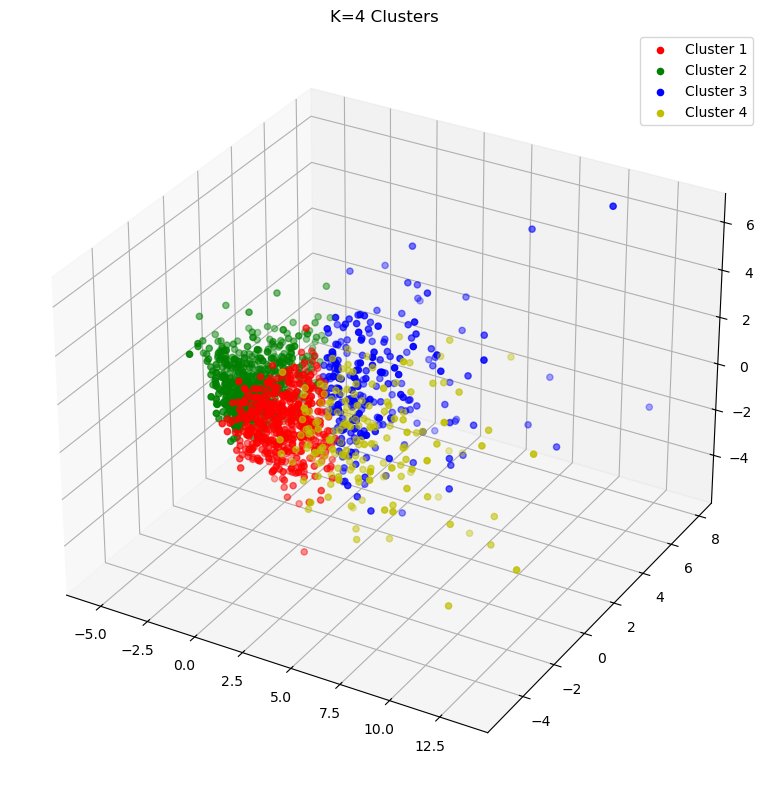

In [34]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Get statistics for k=4
stats_k4, sizes_k4, clusters4 = analyze_clusters(X_pca_reduced, df, 4)

print("\nK=4 Cluster Sizes:")
print(sizes_k4)
print("\nK=4 Cluster Statistics:")
print(stats_k4.to_string())

# K=4 plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors4 = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters4):
    ax.scatter(X_pca_reduced[cluster, 0], 
              X_pca_reduced[cluster, 1], 
              X_pca_reduced[cluster, 2], 
              c=colors4[i], label=f'Cluster {i+1}')
ax.set_title('K=4 Clusters')
ax.legend()

plt.tight_layout()
plt.show()

k=4 seems to be a better cluster size because when looking at the values and in the context of baseball, each cluster when separated into 3 is able to cluster great, average, and below average players. However, 4 clusters can distinguish players that are power hitters and speed/contact players through looking at the Caught stealing, Triple, Stolen bases statistics. Therefore, we decided to use k=4.

### 3-3. Compare Silhouette Scores pre and post PCA

In [35]:
# Calculation of silhouette scores pre-PCA
centroids, clusters = k_means(X_scaled, 4)
labels = np.zeros(X_scaled.shape[0])
for i, cluster in enumerate(clusters):
    labels[cluster] = i
pre_pca_silhouette = silhouette_score(X_scaled, labels)

# Calculation of silhouette scores post-PCA
centroids_pca, clusters_pca = k_means(X_pca_reduced, 4)
labels_pca = np.zeros(X_pca_reduced.shape[0])
for i, cluster in enumerate(clusters_pca):
    labels_pca[cluster] = i
post_pca_silhouette = silhouette_score(X_pca_reduced, labels_pca)

print(f"Before PCA: {pre_pca_silhouette}")
print(f"After PCA: {post_pca_silhouette}")

Before PCA: 0.2251122464659431
After PCA: 0.29383419982481435


### 3-4. Final clustering and its comparison to non-PCA reduced clustering

In [36]:
import time

In [37]:
# Perform final clustering
print('Scaled data')
start_time = time.time()
centroids, clusters = k_means(
    X_scaled, 4, print_complexity=True
)
end_time = time.time()
execution_time = end_time - start_time

cluster_labels = np.zeros(X_scaled.shape[0])
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = i
print("Execution Time:", execution_time)

Scaled data
Time Complexity Analysis:
Number of Points (m): 1504
Number of Clusters (K): 4
Number of Iterations (I): 12
Number of Attributes (n): 14
Execution Time: 0.008496999740600586


In [38]:
# Perform final clustering
print('Reduced data')
start_time = time.time()
centroids, clusters = k_means(
    X_pca_reduced, 4, print_complexity=True
)
end_time = time.time()
execution_time = end_time - start_time
cluster_labels = np.zeros(X_pca_reduced.shape[0])
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = i
print("Execution Time:", execution_time)

Reduced data
Time Complexity Analysis:
Number of Points (m): 1504
Number of Clusters (K): 4
Number of Iterations (I): 17
Number of Attributes (n): 3
Execution Time: 0.005588054656982422


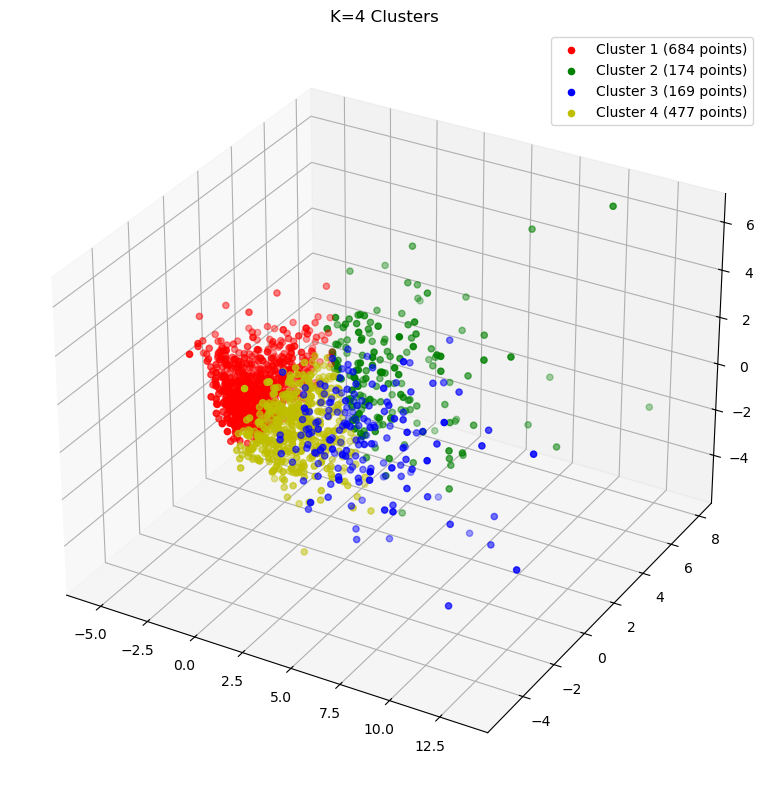

In [39]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
centroids4, clusters4 = centroids, clusters
cluster_counts = [len(cluster) for cluster in clusters4]
colors4 = ['r', 'g', 'b', 'y']
for i, cluster in enumerate(clusters4):
    ax.scatter(X_pca_reduced[cluster, 0], 
              X_pca_reduced[cluster, 1], 
              X_pca_reduced[cluster, 2], 
              c=colors4[i], label=f'Cluster {i+1} ({cluster_counts[i]} points)'
    )
ax.set_title('K=4 Clusters')
ax.legend()

plt.tight_layout()
plt.show()

## 4. Impact of Dimensionality Reduction on Clustering Performance

Our analysis demonstrates several key impacts of PCA dimensionality reduction on the k-means clustering:

1. Computational Efficiency:
  - Original data: 14 dimensions
  - Reduced data: 3 dimensions
  - Reduced computational complexity by 78% (11/14)
  - Reduced time of execution by around 35%
  - Principal components effectively capture key batting attributes:
    - PC1: Offensive production (Runs: 0.343, RBI: 0.336, Doubles: 0.327)
    - PC2: Player speed and power (Stolen Base: 0.464, Triple: 0.417, Caught Stealing: 0.365)
    - PC3: Offensive discipline and contact ability (Strikeouts: 0.498, AVG: 0.475, OBP: 0.389)

2. Clustering Quality:
  - Pre-PCA silhouette score: 0.225
  - Post-PCA silhouette score: 0.294
  - Silhouette score increased with dimensional reduction using PCA, proving a better separation after PCA.
  - Analysis of clusters:
    - Cluster 1 (684 players): Role Players
    - Cluster 2 (174 players): Elite Power Hitters (max OPS, HR, RBI, Hits, Runs, Doubles, Slugging percentage)
    - Cluster 3 (169 players): Elite Speed/Contact Hitters (max Triples, Stolen base, AVG)
    - Cluster 4: (477 players): Average All-Rounded Players

3. Noise Reduction:
  - Retained 80%+ of variance while removing noise.
  - Improved cluster separation by focusing on principal components.

4. Baseball Context:
  - Through PCA analysis and the K-means clustering, a better classification of players were done that aligned with traditional baseball archetypes.
  - An identification of specialized skills (power vs. speed) was possible with 4 clusters.
  - There was a clearer separation between performance levels, which led to more actionable insights for player scouting, team composition, and player evaluation.
  - Additional advanced baseball data such as WAR or mWRC that measures better offensive productivity could further enhance clustering by player skills and level.